

`Auteur: Amadou LY`


# Projet Final M2SID

## Objectif

### Training, Evaluation et Selection de Modele du Type de Vin 

In [1]:
import numpy as np

# pour rendre les outputs de ce notebook identiques à chaque exécution
np.random.seed(28)

# ignorer les FuturWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import os
from wine_aly import helpers

CSV_PATH = os.path.join("../", "datasets", "dft_train.csv")


dft_train = helpers.load_csv(CSV_PATH,sep=",")
dft_train.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,9.0,0.430,0.30,1.50,0.050,175.0,0.99510,3.11,0.45,9.7,4,1
1,5.6,0.205,0.16,12.55,0.051,115.0,0.99564,3.40,0.38,10.8,6,1
2,10.2,0.670,0.39,1.90,0.054,17.0,0.99760,3.17,0.47,10.0,5,0
3,9.5,0.735,0.10,2.10,0.079,31.0,0.99860,3.23,0.56,10.1,6,0
4,6.5,0.300,0.27,4.00,0.038,97.0,0.99026,3.20,0.60,12.6,8,1
5,7.8,0.430,0.49,13.00,0.033,158.0,0.99550,3.14,0.35,11.3,6,1
6,7.4,0.360,0.29,2.60,0.087,72.0,0.99645,3.39,0.68,11.0,5,0
7,7.4,0.440,0.20,11.50,0.049,157.0,0.99800,3.27,0.44,9.0,5,1
8,7.9,1.040,0.05,2.20,0.084,29.0,0.99590,3.22,0.55,9.9,6,0
9,9.2,0.540,0.31,2.30,0.112,38.0,0.99699,3.24,0.56,10.9,5,0


In [3]:
CSV_PATH = os.path.join("../", "datasets","dft_test.csv")


dft_test = helpers.load_csv(CSV_PATH,sep=",")
dft_test.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.1,0.44,0.62,11.8,0.044,152.0,0.99750,3.12,0.46,8.7,6,1
1,7.9,0.16,0.30,4.8,0.037,171.0,0.99670,3.47,0.44,9.0,4,1
2,6.9,0.23,0.41,8.0,0.030,114.0,0.99368,3.22,0.54,11.0,6,1
3,6.4,0.32,0.31,1.9,0.037,126.0,0.99000,3.06,0.45,11.8,6,1
4,7.7,0.39,0.28,4.9,0.035,109.0,0.99180,3.19,0.58,12.2,7,1
5,8.8,0.60,0.29,2.2,0.098,15.0,0.99880,3.36,0.49,9.1,5,0
6,6.8,0.26,0.40,7.5,0.046,179.0,0.99583,3.20,0.49,9.3,5,1
7,7.6,0.23,0.64,12.9,0.033,170.0,0.99800,3.00,0.53,8.8,5,1
8,6.7,0.13,0.57,6.6,0.056,150.0,0.99548,2.96,0.43,9.4,6,1
9,9.3,0.36,0.39,1.5,0.080,55.0,0.99652,3.47,0.73,10.9,6,0


In [4]:
X_train = dft_train.drop('color', axis=1)
X_test = dft_test.drop('color', axis=1)
y_train = dft_train['color']
y_test = dft_test['color']

In [5]:
import warnings
warnings.filterwarnings('ignore')

##### Modelling avec  LogisticRegression 

In [6]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_test, y_test)

0.9830769230769231

###### Avec Logistic Regression on a un score de 0.9830

In [8]:
X_test.iloc[[28]]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
28,7.1,0.44,0.27,8.4,0.057,160.0,0.99257,3.16,0.36,11.8,6


###### on predit valeurs num 28 dans test dataset

In [9]:
log_reg.predict(X_test.iloc[[28]])

array([1], dtype=int64)

In [10]:
log_reg.predict_proba(X_test.iloc[[28]])

array([[5.90041291e-04, 9.99409959e-01]])

###### sa predit avec proba de 0.9994 c'est color=1 blanc

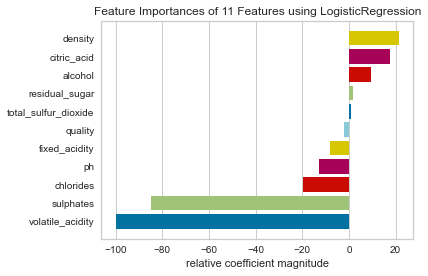

<AxesSubplot:title={'center':'Feature Importances of 11 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [11]:
import matplotlib.pyplot as plt
from yellowbrick.features import FeatureImportances
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(log_reg, relative=True)
fi_viz.fit(X_train, y_train)
fi_viz.poof()

###### visualisation de variable qui contribue mieux sur la  modele  LogisticRegression on remarque volatile acidity ,sulphates,chlorides et density

In [12]:
from sklearn.naive_bayes import (
    GaussianNB, 
    MultinomialNB, 
    ComplementNB,
    BernoulliNB,
    CategoricalNB,
)

bayes_models = [
    GaussianNB, 
     MultinomialNB, # Doesn't suport negative values in input
     ComplementNB, # Doesn't suport negative values in input
    BernoulliNB,
    #CategoricalNB,
]
for model in bayes_models:
    cls = model()
    cls.fit(X_train, y_train)
    print(
        f"{model.__name__:13} " 
        f"Score: {cls.score(X_test, y_test):.2f} "
        f"Predict: {cls.predict(X_test.iloc[[28]])} "
        f"Predict_proba: {cls.predict_proba(X_test.iloc[[28]])} "
    )

GaussianNB    Score: 0.97 Predict: [1] Predict_proba: [[1.92492293e-08 9.99999981e-01]] 
MultinomialNB Score: 0.92 Predict: [1] Predict_proba: [[4.68691429e-12 1.00000000e+00]] 
ComplementNB  Score: 0.91 Predict: [1] Predict_proba: [[1.43575686e-11 1.00000000e+00]] 
BernoulliNB   Score: 0.78 Predict: [1] Predict_proba: [[0.23123334 0.76876666]] 


###### avec modeles de bayes on a de score tres eleves sauf avec BernoulliNB mais  c'est pas  mal  c'est acceptable

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifyers = [
    LogisticRegression(
    random_state=28
    ),
    KNeighborsClassifier(),
    SVC(
        random_state=28, 
        probability=True
    ),
    DecisionTreeClassifier(
        random_state=28, 
        max_depth=4
    ),
    RandomForestClassifier(
        n_estimators=10,
        random_state=28, 
        max_depth=4, 
        class_weight='balanced'
    )
]
models = []
for classifyer in classifyers:
    classifyer.fit(X_train, y_train)
    print(f"{classifyer.__class__.__name__:22}: trained")
    models.append(classifyer)

LogisticRegression    : trained
KNeighborsClassifier  : trained
SVC                   : trained
DecisionTreeClassifier: trained
RandomForestClassifier: trained


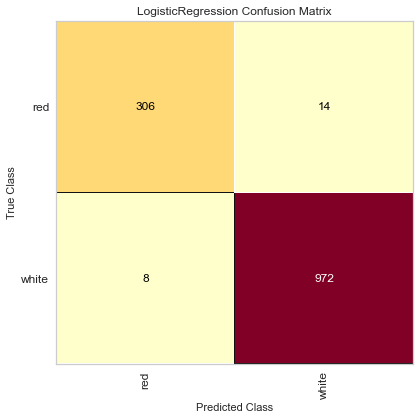

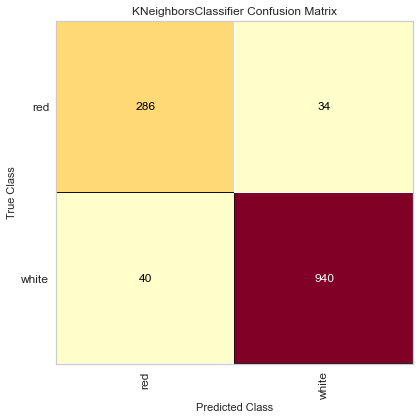

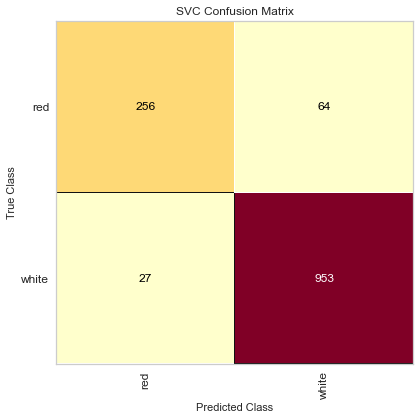

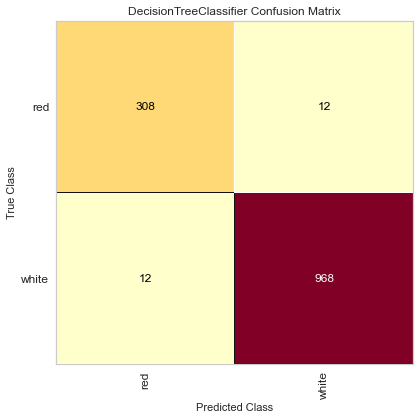

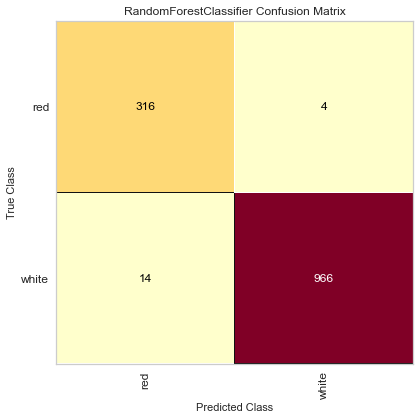

In [14]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix

mapping = {0: "red", 1: "white"}
for model in models:
    fig, ax = plt.subplots(figsize=(6, 6))
    cm_viz = ConfusionMatrix(
        model,
        classes=["red", "white"],
        label_encoder=mapping
    )
    cm_viz.score(X_test, y_test)
    cm_viz.poof()

###### avec la matrice de confusion on peut savoir la performence de modele 
      on remarque true postive et true negative sont quasiment supprieur a false positive et false negative,  donc on peut dire que  nos modeles sont performents

In [15]:
# TP + TN / (TP + FP + TN + FN)
from sklearn.metrics import accuracy_score

for model in models:
    y_pred = model.predict(X_test)
    print(
    f"{model.__class__.__name__:22}: Accuracy = {accuracy_score(y_test, y_pred)} \n"
    )

LogisticRegression    : Accuracy = 0.9830769230769231 

KNeighborsClassifier  : Accuracy = 0.943076923076923 

SVC                   : Accuracy = 0.93 

DecisionTreeClassifier: Accuracy = 0.9815384615384616 

RandomForestClassifier: Accuracy = 0.9861538461538462 



###### on a ici  le pourcentage de classifications correctes ou le pourcentage de bonnes prédictions

In [16]:
# TP / (TP + FP)
from sklearn.metrics import precision_score

for model in models:
    y_pred = model.predict(X_test)
    print(
    f"{model.__class__.__name__:22}: Precision = {precision_score(y_test, y_pred)} \n"
    )

LogisticRegression    : Precision = 0.9858012170385395 

KNeighborsClassifier  : Precision = 0.9650924024640657 

SVC                   : Precision = 0.9370698131760079 

DecisionTreeClassifier: Precision = 0.9877551020408163 

RandomForestClassifier: Precision = 0.9958762886597938 



###### la precision de nos modele vaut on regarde les resultats au dessus 

In [17]:
# TP / (TP + FN)
from sklearn.metrics import recall_score

for model in models:
    y_pred = model.predict(X_test)
    print(
    f"{model.__class__.__name__:22}: Recall = {recall_score(y_test, y_pred)} \n"
    )

LogisticRegression    : Recall = 0.9918367346938776 

KNeighborsClassifier  : Recall = 0.9591836734693877 

SVC                   : Recall = 0.9724489795918367 

DecisionTreeClassifier: Recall = 0.9877551020408163 

RandomForestClassifier: Recall = 0.9857142857142858 



###### Recall pourcentage de true positive correctements classer

In [18]:
# (2 * precision * recall) / (precision + recall)
from sklearn.metrics import f1_score

for model in models:
    y_pred = model.predict(X_test)
    print(
    f"{model.__class__.__name__:22}: f1_score = {f1_score(y_test, y_pred)} \n"
    )

LogisticRegression    : f1_score = 0.9888097660223805 

KNeighborsClassifier  : f1_score = 0.962128966223132 

SVC                   : f1_score = 0.9544316474712068 

DecisionTreeClassifier: f1_score = 0.9877551020408163 

RandomForestClassifier: f1_score = 0.9907692307692308 



###### on a ici recall

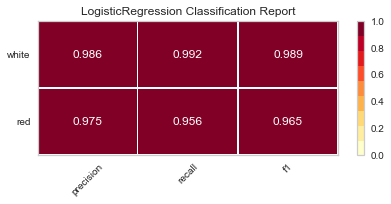

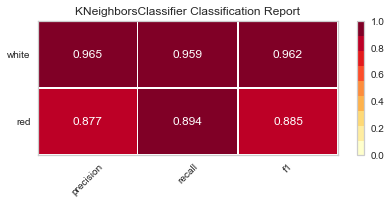

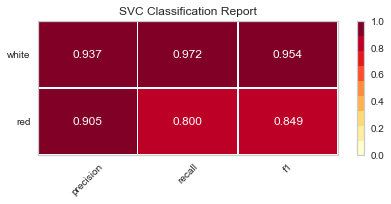

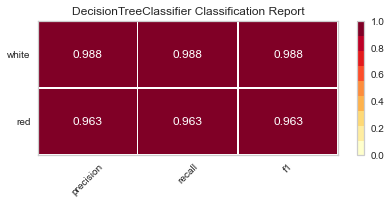

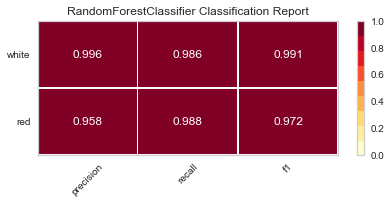

In [19]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import (
    ClassificationReport,
)

for model in models:
    fig, ax = plt.subplots(figsize=(6, 3))
    cm_viz = ClassificationReport(
        model,
        classes=["red", "white"],
        label_encoder=mapping
    )
    cm_viz.score(X_test, y_test)
    cm_viz.poof()

###### On a ici la resume pour chaque modele  avec precision ,recall et f1

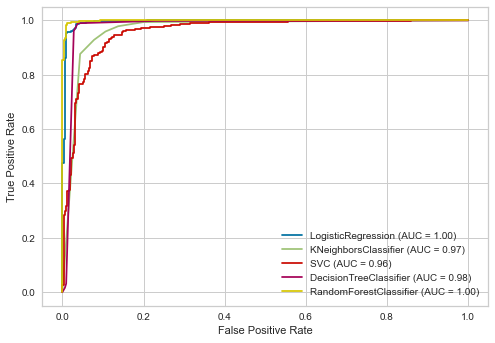

In [20]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
for model in models:
    plot_roc_curve(model, X_test, y_test, ax=ax)

###### courbe ROC nous montre la performence de nos modeles en se basant sur pourcentage de de true positive en fonction de false positive en plus lequel est plus performent

In [21]:
from sklearn.metrics import roc_auc_score

for model in models:
    y_pred = model.predict(X_test)
    roc_auc_score(y_test, y_pred)
    print(
    f"{model.__class__.__name__:22}: roc_auc_score = {roc_auc_score(y_test, y_pred)} \n"
    )

LogisticRegression    : roc_auc_score = 0.9740433673469389 

KNeighborsClassifier  : roc_auc_score = 0.926466836734694 

SVC                   : roc_auc_score = 0.8862244897959184 

DecisionTreeClassifier: roc_auc_score = 0.975127551020408 

RandomForestClassifier: roc_auc_score = 0.9866071428571429 



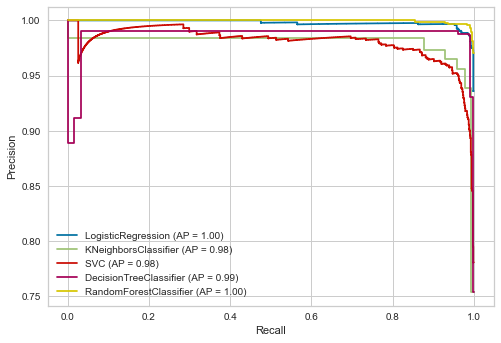

In [22]:
from sklearn.metrics import plot_precision_recall_curve

ax = plt.gca()
for model in models:
    plot_precision_recall_curve(model, X_test, y_test, ax=ax)

###### precision recall curve sa visualise la performence quand la modele applique la test en se basant sur precision en fonction de recall et sa montre est ce que nos modeles test bien .. d'apres la courbe nos modeles test bien  

## Selection de modeles 

### D'apres les 2 graphes les modeles selectionnées sont : LogisticRegression Et RandomForestClassifier